In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn_extra.cluster import KMedoids
from sklearn.cluster import AgglomerativeClustering
from sklearn.model_selection import train_test_split
import scipy.cluster.hierarchy as sch

In [2]:
#installing data
data = pd.read_csv(r"D:\downs\riceClassification.csv")
data= data.drop(['id','label'], axis=1)

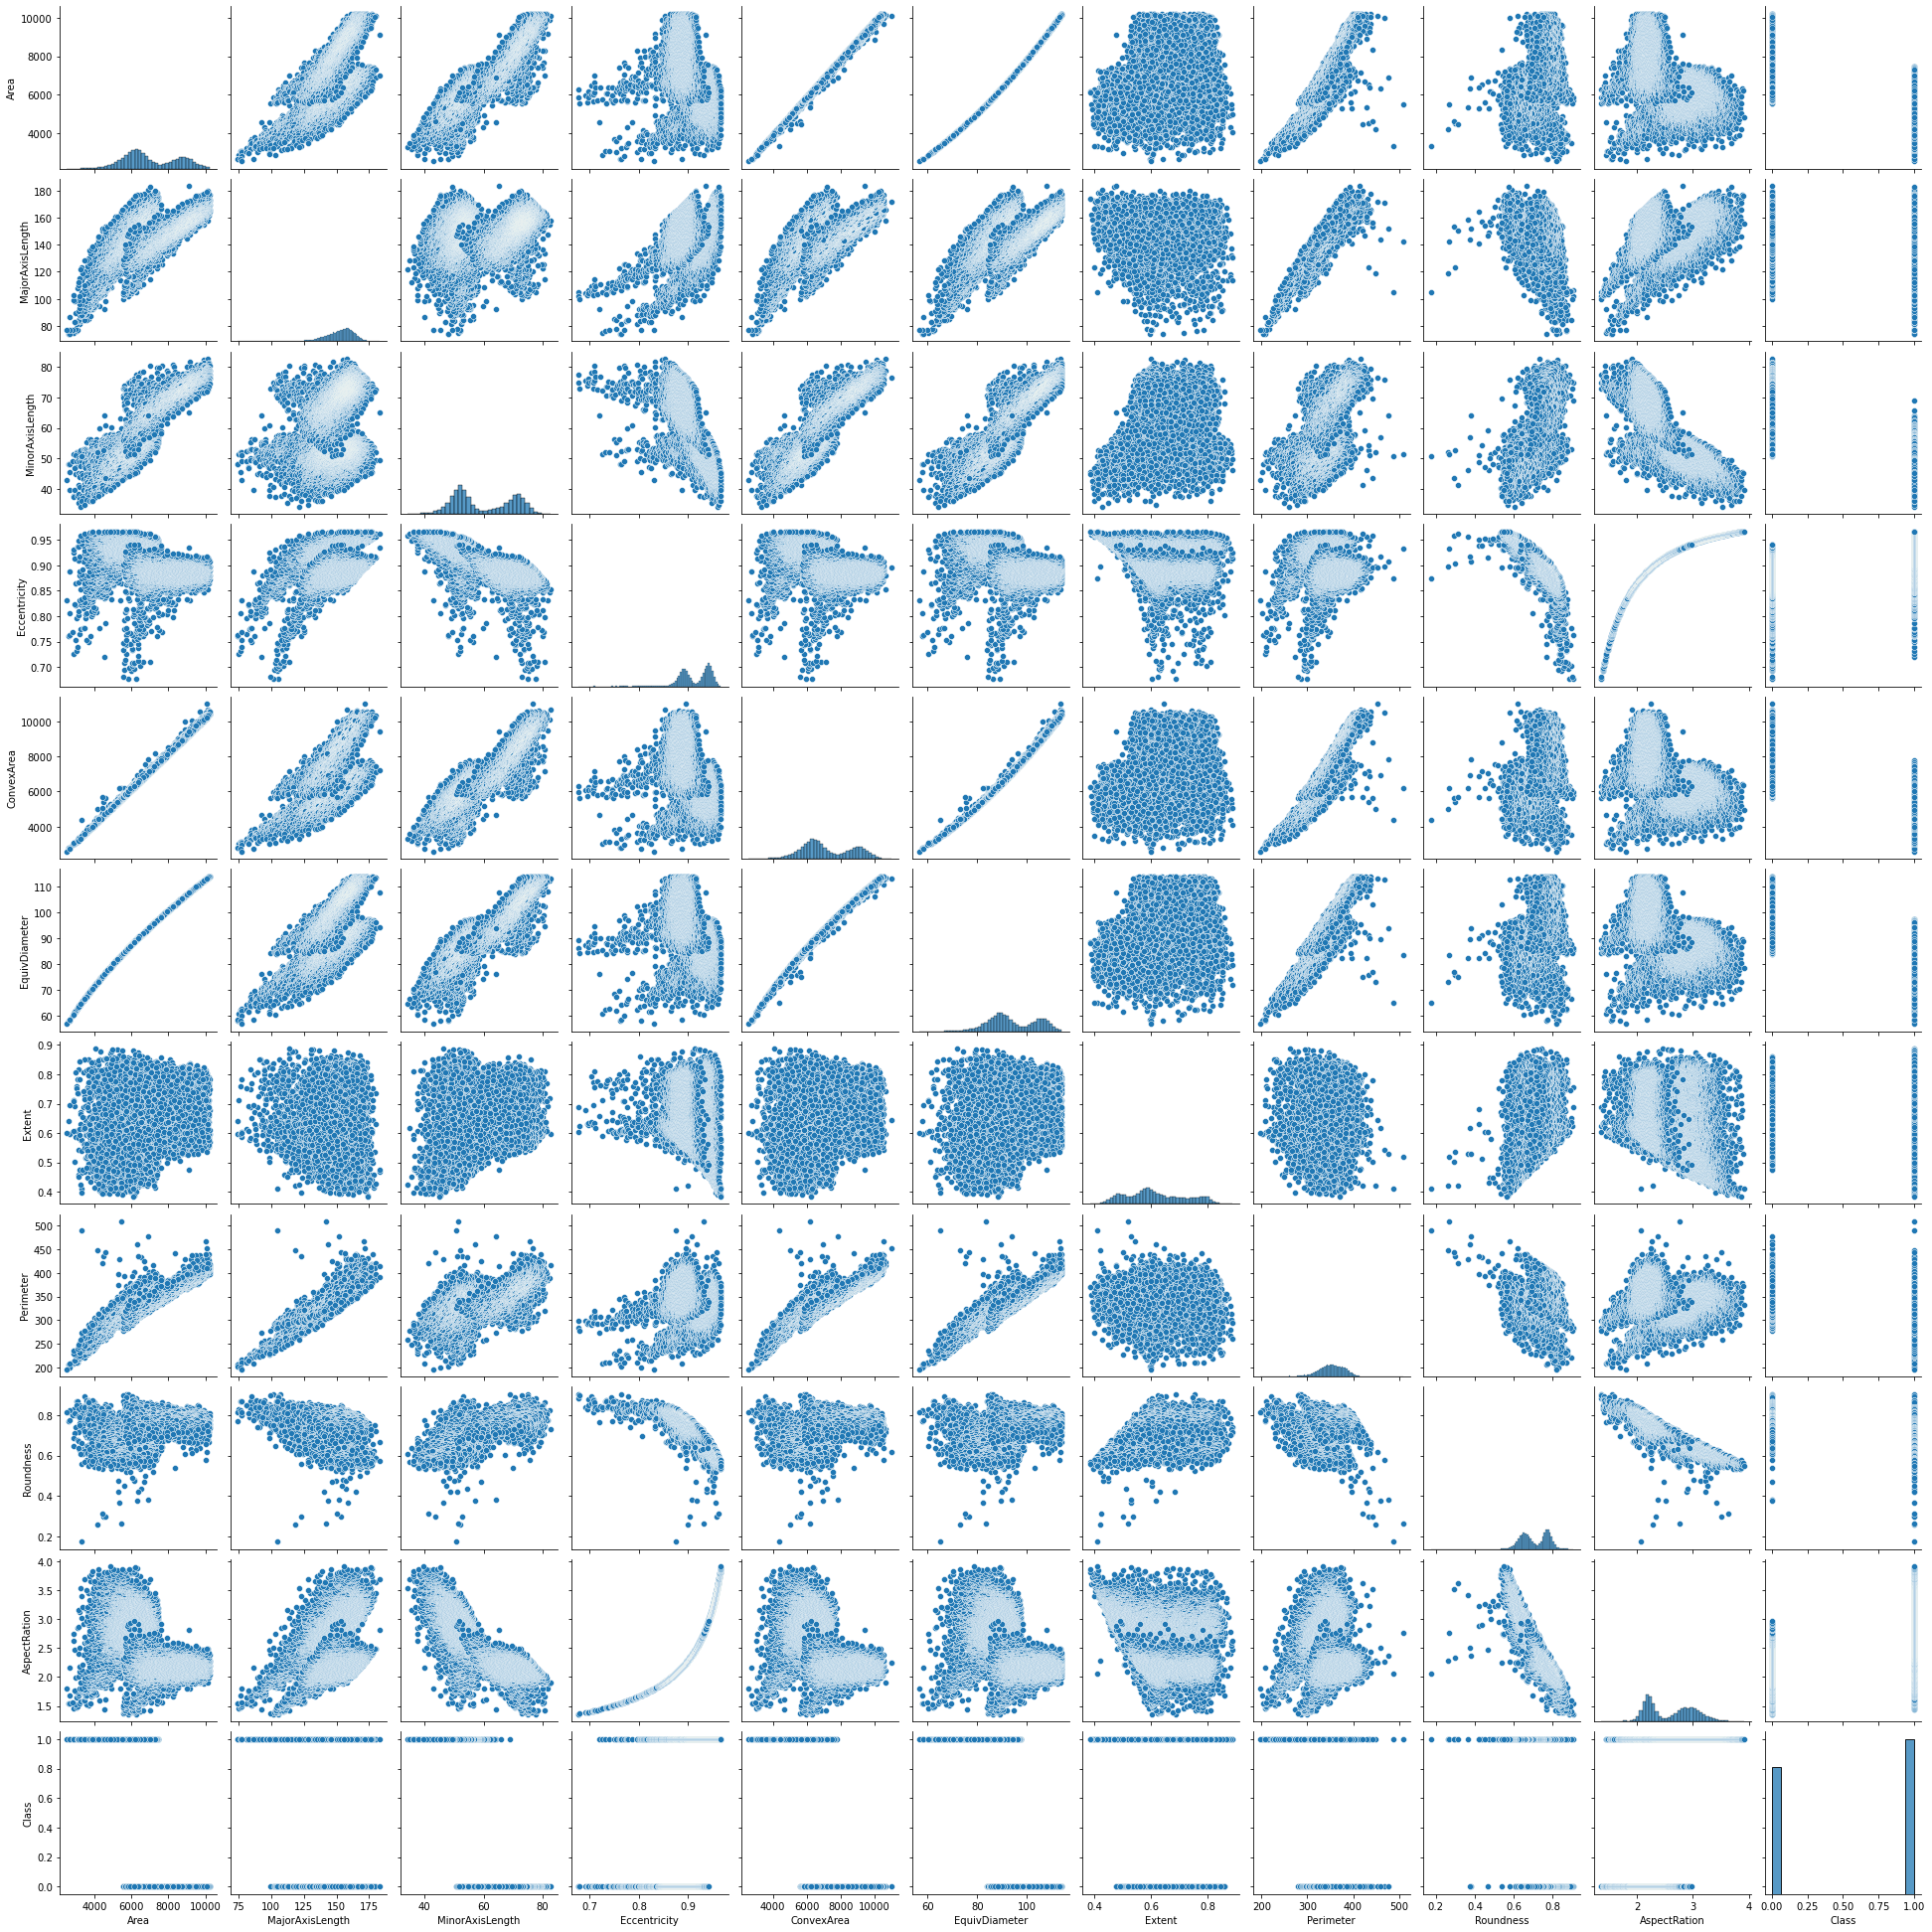

In [3]:
#to see common properties about the data
sns.pairplot(data)

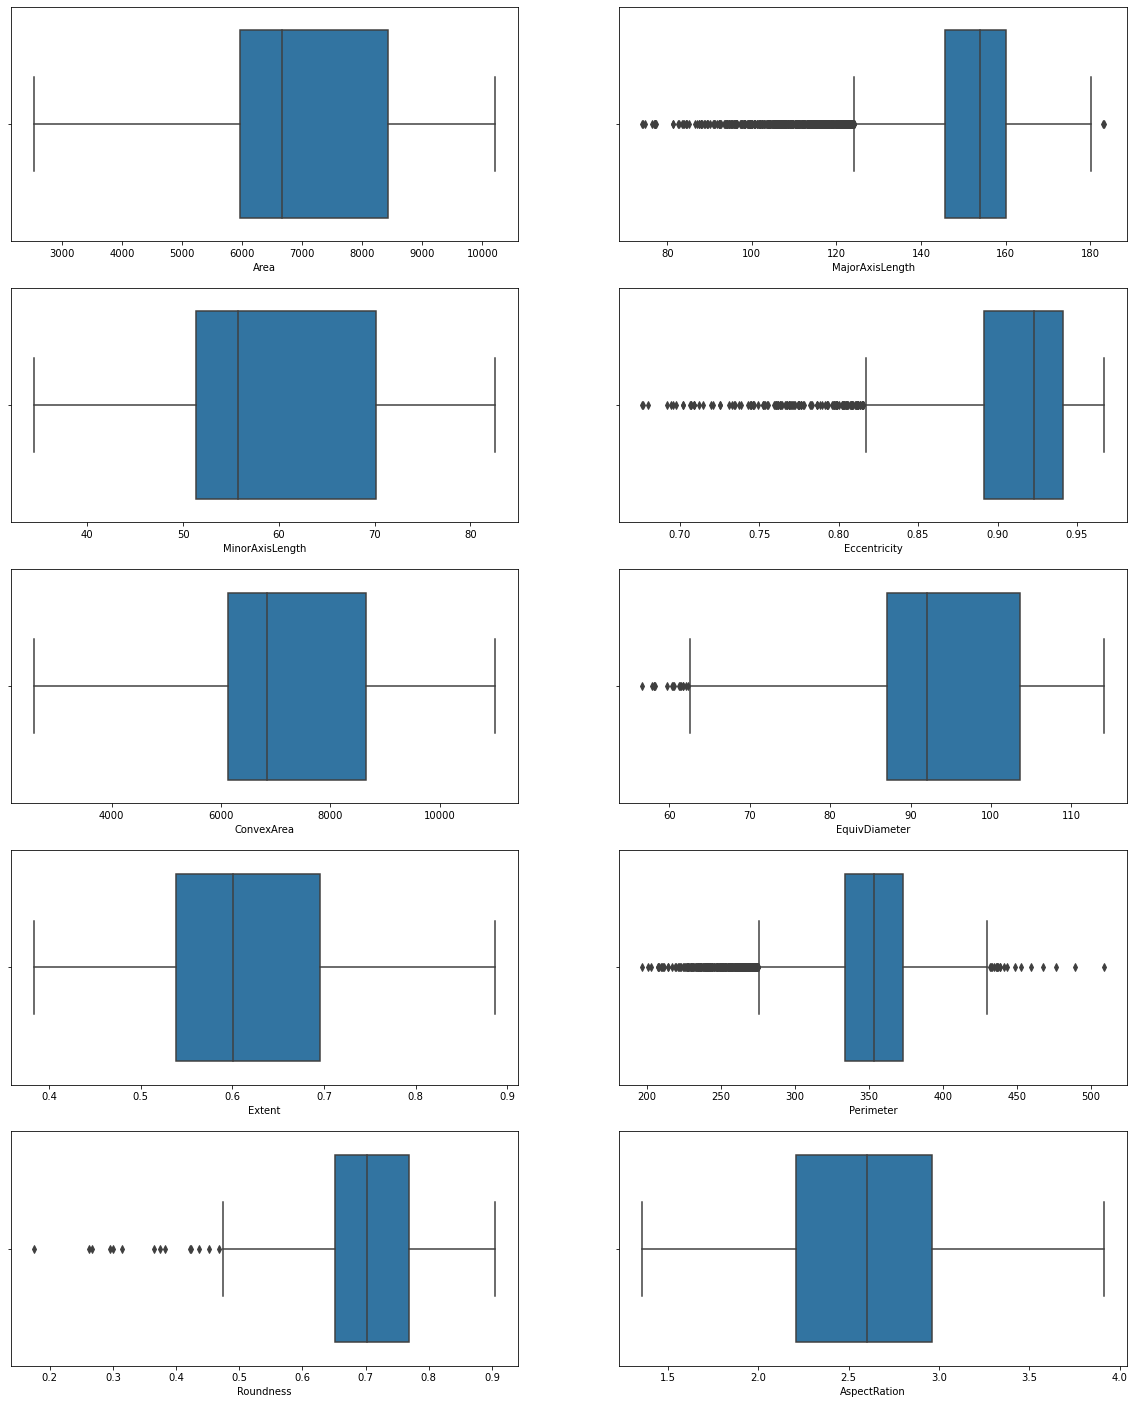

In [4]:
#boxblots before data cleaning
fig, axes = plt.subplots(5,2, figsize=(20,25))
k = 0
for i in range(0,5):
    for j in range(0,2):
        sns.boxplot(ax=axes[i,j], data=data, x=data.columns[k])
        k=k+1

In [5]:
minimum_thresold, maximum_thresold= data['MajorAxisLength'].quantile([0.1,0.95])
minimum_thresold, maximum_thresold

(136.59698186, 167.14071528)

In [6]:
data.isnull().sum()

Area               0
MajorAxisLength    0
MinorAxisLength    0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Perimeter          0
Roundness          0
AspectRation       0
Class              0
dtype: int64

In [7]:
#data cleaning
data = data[(data.MajorAxisLength<maximum_thresold) &(data.MajorAxisLength>minimum_thresold)]
X = data.drop(["Class"],axis=1)
Y = data["Class"]

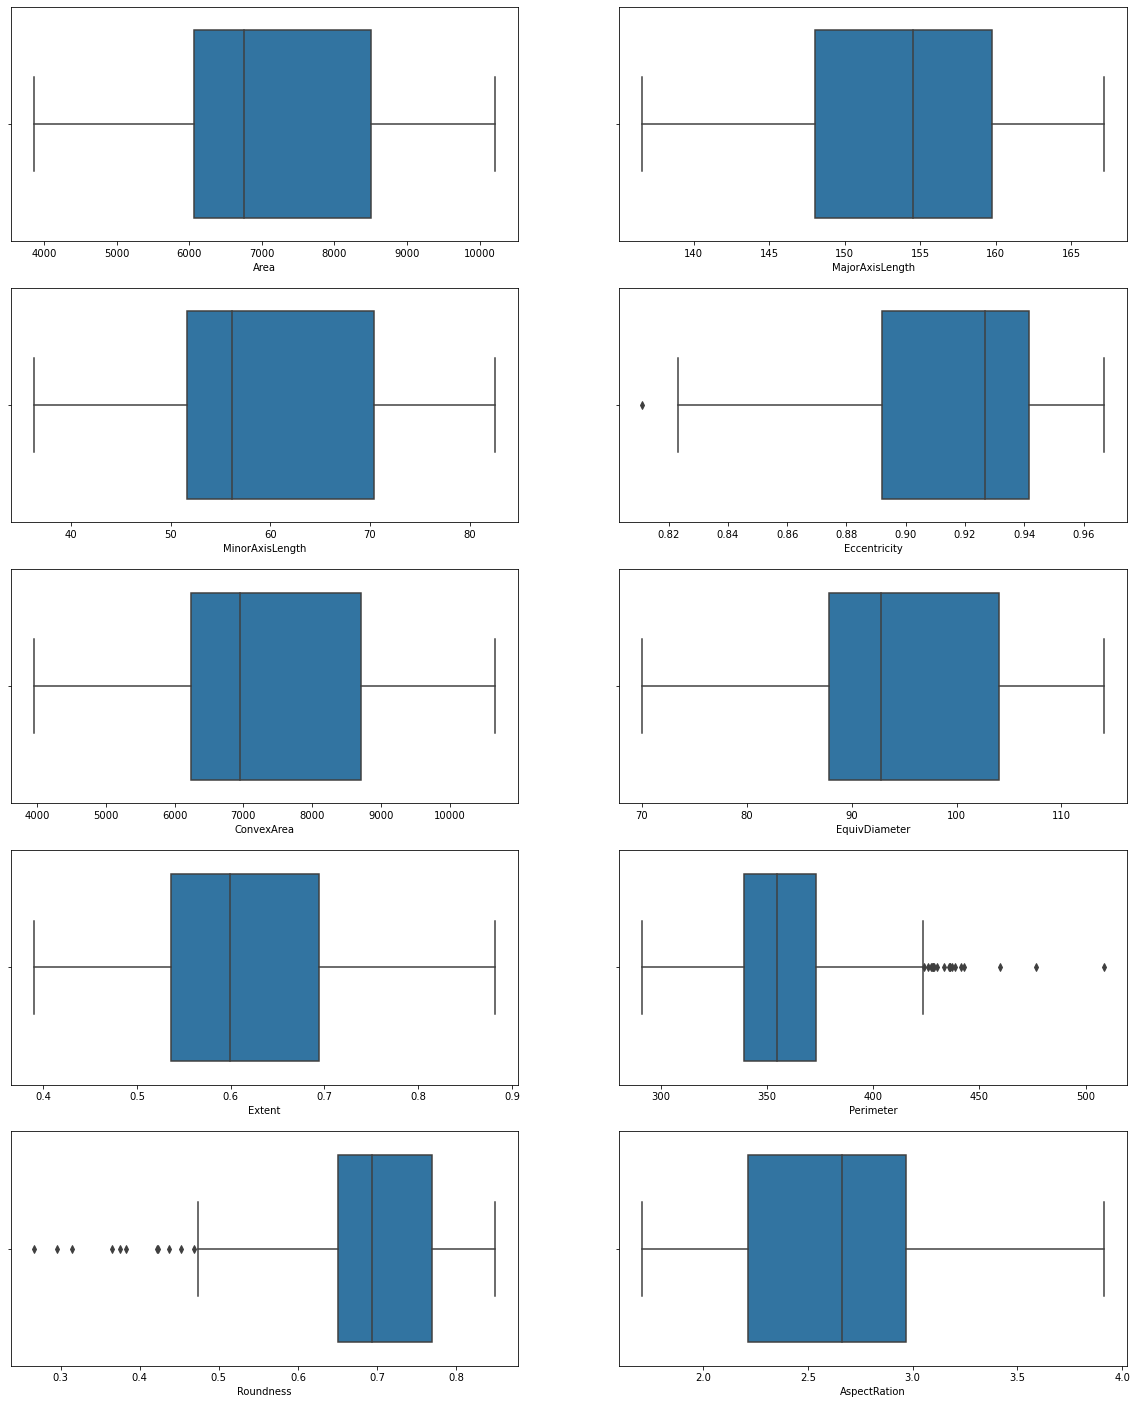

In [8]:
#boxblots after data cleaning
fig, axes = plt.subplots(5,2, figsize=(20,25))
k = 0
for i in range(0,5):
    for j in range(0,2):
        sns.boxplot(ax=axes[i,j], data=data, x=data.columns[k])
        k=k+1

In [9]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=1)

98.46883761052403


Text(0.5, 1.0, 'Type of Rice vs Predicted Type of Rice')

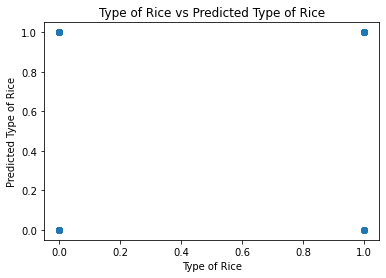

In [10]:
Naive = GaussianNB()
Naive.fit(X_train,Y_train.values.ravel())
Naive_pred = Naive.predict(X_test)
Naive_acc = accuracy_score(Naive_pred,Y_test)*100
print(Naive_acc)
plt.scatter(Y_test, Naive_pred)
plt.xlabel("Type of Rice")
plt.ylabel("Predicted Type of Rice")
plt.title("Type of Rice vs Predicted Type of Rice")

93.50873409532025


Text(0.5, 1.0, 'Type of Rice vs Predicted Type of Rice')

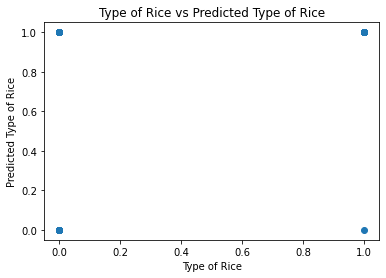

In [11]:
Kmed = KMedoids(n_clusters = 2, metric = 'manhattan')
Kmed.fit(X_train, Y_train)
Kmed_pred = Kmed.predict(X_test)
Kmed_acc = accuracy_score(Kmed_pred, Y_test)*100
print(Kmed_acc)
plt.scatter(Y_test, Kmed_pred)
plt.xlabel("Type of Rice")
plt.ylabel("Predicted Type of Rice")
plt.title("Type of Rice vs Predicted Type of Rice")

95.2986844942851


Text(0.5, 1.0, 'Type of Rice vs Predicted Type of Rice')

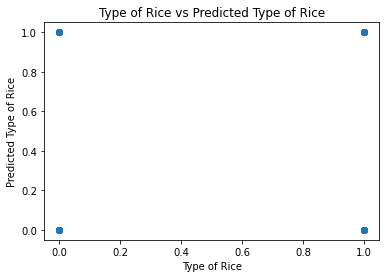

In [12]:
Agg = AgglomerativeClustering(n_clusters = 2)
Agg_pred = Agg.fit_predict(X_test, Y_train)
Agg_acc = accuracy_score(Agg_pred, Y_test)*100
print(Agg_acc)
plt.scatter(Y_test, Agg_pred)
plt.xlabel("Type of Rice")
plt.ylabel("Predicted Type of Rice")
plt.title("Type of Rice vs Predicted Type of Rice")

In [ ]:
# plt.rcparam['figure.figsize']=(15,15)
dendro=sch.dendrogram(sch.linkage(X,method='single'))